### Measure of the probability of exiting the boundary at any time

This is the follow up notebook to the notebook: "infinitedoublewell_eta.ipynb". 

In this section, I focus on measuring the probability of the numerical method yielding at any point a trajectory above or below a certain treshold. 

$$
P(\exists ! x: x < 0 | x > b \ \ \forall t \in [0,T])
$$

This probability means that the numba code should be modified. At any point when a path cross the treshold, it is unnecessary to continue computing it and we can simply register it and continue with the next path. The code needs to be adapted. 

In [1]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
%matplotlib inline
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 17}

# matplotlib.rc('font', **font)

import scipy.integrate as integrate

## ---------------- Mathplotlib settings ----------------
SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 25

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
%run "/home/s2133976/OneDrive/ExtendedProject/codingUsingNumba/WeakSDEapproximation/numba code/infinitedoublewell_nsample_p.py"


def nesc_p(n_samples,dt,list_var,T,b):
    """
    Function to establish the proportion of escaping trajectories
    Input :
    ------
    n_samples: int
        number of samples generated
    dt: float
        Time increment
    list_var: list of float
        list of values of the temperature to evaluate 
    T: int
        Final time until the solution is ran
    b: int
        Boundary selected
    """
    # empty vector to save results
    y_res = np.zeros((len(list_var),n_samples))
    #list of escaping trajectories
    nesc_list=[]
    #run through the different values of tau 
    for i in range(len(list_var)):
        tau_i=list_var[i]
        y_exact = IDW_nsample_p(n_samples,T,dt,tau_i,b)
        y_res[i,::]=y_exact
        nescp=len(y_exact[y_exact==-99])/len(y_exact)
        nesc_list.append(nescp)
    return(nesc_list,y_res)

In [15]:
## Plot results on the simulation
n_samples = 10**4
dt=0.01
b1=0.1
b2=2
inc=(b2-b1)/20
tau_list1=np.round(np.arange(b1,b2+inc,inc),3)
T=100
b=50
# empty vector to save results
nesc_dt001,yres1=nesc_p(n_samples,dt,tau_list1,T,b)
dt=0.1
nesc_dt01,yres2=nesc_p(n_samples,dt,tau_list1,T,b)


Text(0.5, 0, '$\\tau $')

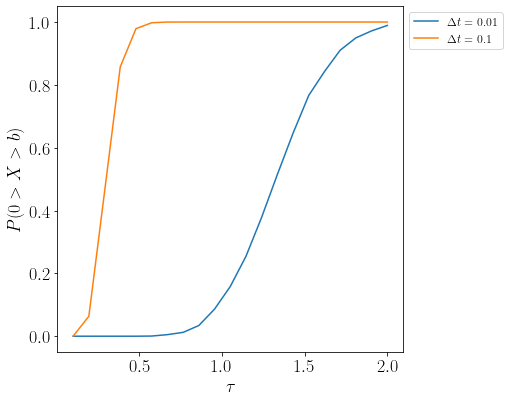

In [22]:
fig, (ax1)= plt.subplots(1, 1,figsize=(6,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax1.plot(tau_list1,nesc_dt001,label="$\Delta t=0.01$")
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1)) #add the legend
ax1.set_ylabel("$P(0 > X(t)> b) $")
ax1.set_xlabel("$\\tau $")

ax1.plot(tau_list1,nesc_dt01,label="$\Delta t=0.1$")
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1)) #add the legend
ax1.set_ylabel("$P(0 > X> b) $")
ax1.set_xlabel("$\\tau $")

As before, we look at where it is interesting to look at. 

For $\Delta t=0.01$, it is interesting to look bw $\tau=0.01$ and $\tau=1$.

For $\Delta t=0.1$, it is interesting to look bw $\tau=0.5$ and $\tau=2$.



In [10]:
## Plot results on the simulation
n_samples = 10**3
T=100
b=50

# Delta t=0.01
dt=0.01
b1=0.5
b2=2
inc=(b2-b1)/20
tau_list3=np.round(np.arange(b1,b2+inc,inc),3)
nesc3,yres3=nesc_p(n_samples,dt,tau_list3,T,b)

In [15]:
# Delta t=0.1
dt=0.1
b1=0.01
b2=0.6
inc=(b2-b1)/20
tau_list4=np.round(np.arange(b1,b2+inc,inc),3)
nesc4,yres4=nesc_p(n_samples,dt,tau_list4,T,b)

Text(0.5, 0, '$\\tau $')

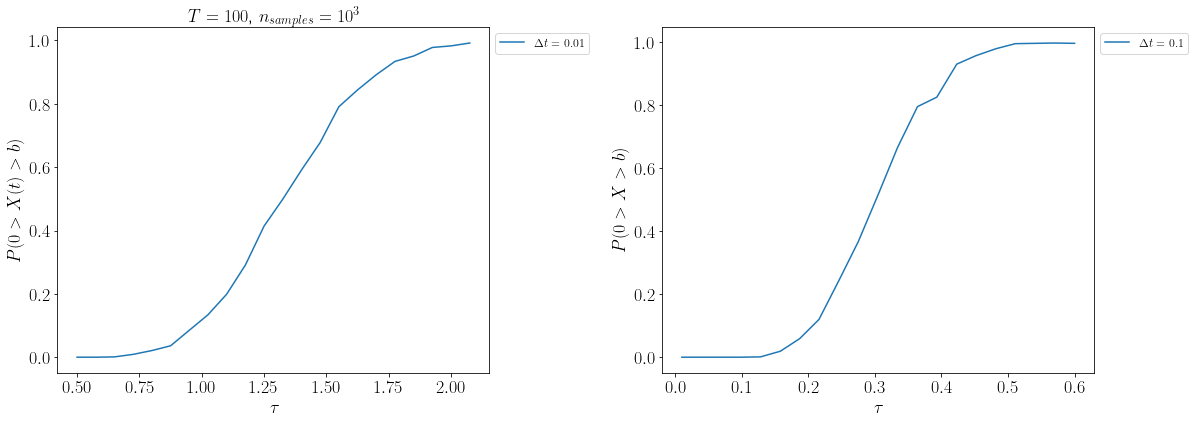

In [16]:
fig, (ax1,ax2)= plt.subplots(1, 2,figsize=(18,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax1.plot(tau_list3,nesc3,label="$\Delta t=0.01$")
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1)) #add the legend
ax1.set_ylabel("$P(0 > X(t)> b) $")
ax1.set_xlabel("$\\tau $")
ax1.set_title("$T=100$, $n_{samples}=10^3$")
ax2.plot(tau_list4,nesc4,label="$\Delta t=0.1$")
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1)) #add the legend
ax2.set_ylabel("$P(0 > X> b) $")
ax2.set_xlabel("$\\tau $")